In [1]:
from scipy.integrate import quad
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

#Все необходимое

def f(x):
    return 1-x

def w():
    return 2*math.pi/2

def printGraphic(name, kn):
    plt.title(name)
    plt.plot( range(len(kn)) , kn,'ro',range(len(kn)) , kn,'g')
    plt.grid(True)
    plt.show()
    
N = 50

int_start = 0
int_end = 1

precision =100


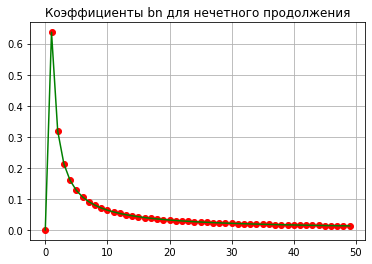

In [2]:
#Продолжаем нечетным образом f(x) = -f(-x)

#Ищем b_n

def integrateFuncSin(x,n):
    return f(x)*np.sin(n*x*w())

b_n = []

for i in range(N):
    b_n.append(2 / int_end * quad(integrateFuncSin, int_start, int_end, args=(i))[0])
printGraphic('Коэффициенты bn для нечетного продолжения' ,b_n)


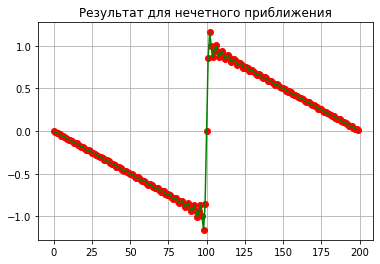

In [3]:
#проверка функции нечетной

def f_sin(x):
    result = 0
    for n in range(1,N):
        result += b_n[n] * np.sin(n*x*w())
    return result
        

f_x_sin = []
for i in range(-int_end*precision,int_end*precision):
    f_x_sin.append(f_sin(i/precision))

printGraphic('Результат для нечетного приближения' ,f_x_sin)

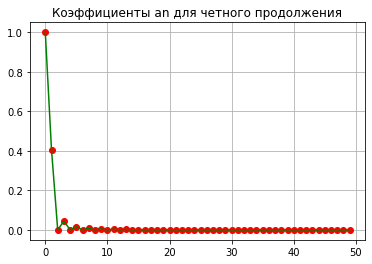

In [4]:
#Продолжаем четным образом f(x) = f(-x)

#Ищем a_n

def integrateFuncCos(x,n):
    return f(x)*np.cos(n*x*w())

a_n = []

for i in range(N):
    a_n.append(2 / int_end * quad(integrateFuncCos, int_start, int_end, args=(i))[0])

printGraphic('Коэффициенты an для четного продолжения' ,a_n)

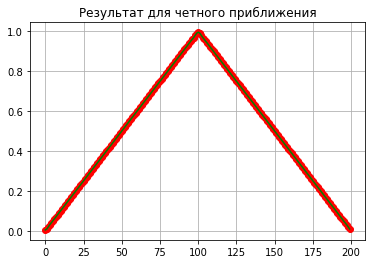

In [5]:
#проверка функции четной

def f_cos(x):
    result = a_n[0] / 2;
    for n in range(1,N):
        result += a_n[n] * np.cos(n*x*w())
    return result
        

f_x_cos = []
for i in range(-int_end*precision,int_end*precision):
    f_x_cos.append(f_cos(i/precision))

printGraphic('Результат для четного приближения' ,f_x_cos)


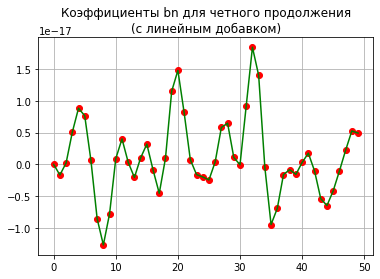

In [6]:
#Линейное преобразование  f(x) -> f(x) - f(0) - (f(1) - f(0))
#Продолжаем нечетным образом f(x) =- f(-x)

#Ищем c_n

def f_mod(x):
    return f(x) - f(int_start) - ((f(int_end) - f(int_start)) * x) / int_end

def integrateFuncSinMod(x,n):
    return f_mod(x)*np.sin(n*x*w())

c_n = []

for i in range(N):
    c_n.append(2 / int_end *quad(integrateFuncSinMod, int_start, int_end, args=(i))[0])

printGraphic('Коэффициенты bn для четного продолжения\n(с линейным добавком)' ,c_n)

#Замечание: масштаб
#В результате получаем 0. Так как у нас линейная функция, то, если мы хотим линейными преобразованиями привести ее к f(0) = f(1) = 0
#в результате получаем тождественный 0. 
#Искажения на графике - следствие точности в python

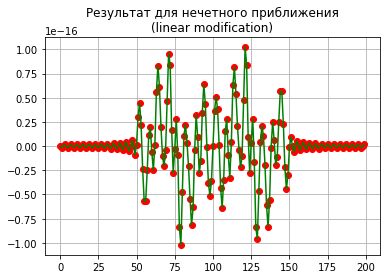

In [7]:
def f_sin_mod(x):
    result = 0
    for n in range(1,N):
        result += c_n[n] * np.sin(n*x*w()) 
    return result
        

f_x_sin_mod = []
for i in range(-int_end*precision,int_end*precision):
    f_x_sin_mod.append(f_sin_mod(i/precision))

printGraphic('Результат для нечетного приближения\n(linear modification)' ,f_x_sin_mod)

#разложили 0 в ряд Фурье))0)